# Limits, Continuity, and Rates

:::{note}
Below is the list of topics that are covered in this section:
- Limits
- Continuity
- Measures of Change over an Interval
- Measures of Change at a Point
- Secant and Tangent Lines
:::

::::{only} latex
:::{note}
Please visit {{ '[the web version of this section]({website}/{path}.html)'.format(website=web_ver_url, path=env.docname) }} to engage with this interactive resource.
:::
::::

In [1]:
import sympy as sp
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
import math

```{index} limits
```

## Limits

In the previous section, while talking about behaviors of some common functions, we saw the phrase "$f(x)$ goes to $\infty$ as $x$ goes to $\infty$".

This phrase describes how the output of a function behaves as the input is **approaching** something and can be written using **limit** notation: $\lim\limits_{x\to\infty}f(x)=\infty$.

The keyword here is "approaching". The input is not equal to a certain point, it is approaching it.

We say that the **limit** of $f(x)$ is $L$ as $x$ approaches $a$ and write this as $\lim\limits_{x\to a}f(x)=L$ provided we can make $f(x)$ as close to $L$ as needed for all $x$ sufficiently close to $a$, from both sides, without actually letting $x$ be $a$.

$\lim\limits_{x\to a}f(x)=L$ can also alternatively be written as $f(x) \to L \text{  as  } x\to a$.

The phrase "from both sides" refer to the **Left-hand limits** and **Right-hand limits**.

For function $f$ defined on an interval containing a constant $a$ (except possibly at $a$ itself):
- Left-hand limit of $f$ as $x$ approaches $a$ from the left is written $\lim\limits_{x\to a^-}f(x)=L_1$
- Right-hand limit of $f$ as $x$ approaches $a$ from the right is written $\lim\limits_{x\to a^+}f(x)=L_2$

Here $a^-$ denotes "to the left of $a$ and $a^+$ denotes "to the right of $a$.

By definition, for function $f$ defined on an interval containing a constant $a$ (except possibly at $a$ itself), the limit of $f$ as $x$ approaches $a$ exists if and only if $\lim\limits_{x\to a^-}f(x)=\lim\limits_{x\to a^+}f(x)=L$, and hence written $\lim\limits_{x\to a}f(x)=L$

:::{admonition} Example 1

Given the graph of $f(x)$ below:

<img src="3LCR1.png" width="250px">

- $\lim\limits_{x\to 0^-}f(x)=0$ while $\lim\limits_{x\to 0^+}f(x)=0$ hence $\lim\limits_{x\to 0}f(x)=0$.
- $\lim\limits_{x\to 1^-}f(x)=1$ while $\lim\limits_{x\to 1^+}f(x)=2$ hence $\lim\limits_{x\to 1}f(x)$ does not exists.

Note that when looking for limits as $x$ approaching $0$ or $1$, it never mattered what $f(0)$ or $f(1)$ is, as we only see the values to the left and right of those points.
:::

Below is a code example that prompt user for a function $f(x)$ and a constant $a$, and then return $\lim\limits_{x\to a}f(x)=L$.

In [6]:
# Prompt the user to input the function f(x) and the constant a
expression_str = input("Enter the function f(x): ")
a = float(input("Enter the constant a: "))

# Define the variable x and the function f(x)
x = sp.symbols('x')
f_x = sp.sympify(expression_str)

# Calculate the limit of f(x) as x approaches a
limit_result = sp.limit(f_x, x, a)

# Print the result
print("The limit of f(x) as x approaches", a, "is:", limit_result)

Enter the function f(x):  4*sin(x)
Enter the constant a:  3.8


The limit of f(x) as x approaches 3.8 is: -2.44743156377088


#### Limit Properties

Assuming $\lim\limits_{x\to a}f(x)$ and $\lim\limits_{x\to a}g(x)$ exists and $c$ is any constant. Then:
- $\lim\limits_{x\to a}\left[c\cdot f(x)\right]=c\cdot \lim\limits_{x\to a}f(x)$
- $\lim\limits_{x\to a}\left[f(x) \pm g(x)\right]=\lim\limits_{x\to a}f(x) \pm \lim\limits_{x\to a}g(x)$
- $\lim\limits_{x\to a}\left[f(x) \cdot g(x)\right]=\lim\limits_{x\to a}f(x) \cdot \lim\limits_{x\to a}g(x)$ 
- $\lim\limits_{x\to a}\left[\dfrac{f(x)}{g(x)}\right]= \frac{\lim\limits_{x\to a}f(x)}{\lim\limits_{x\to a}g(x)}$, provided $\lim\limits_{x\to a}g(x)\neq 0$
- $\lim\limits_{x\to a}\left[f(x)\right]^n=\left[\lim\limits_{x\to a}f(x)\right]^n$
- $\lim\limits_{x\to a} c=c$
- $\lim\limits_{x\to a} x=a$

```{index} continuity
```

## Continuity

Graphically, a function is **continuous** if it can be drawn without lifting the writing utensil from the paper.

Mathematically, a function $f$ is **continuous at $\boldsymbol{x=a}$** if and only if the following three conditions are satisfied:
- $f(a)$ exists
- $\lim\limits_{x\to a}f(x)$ exists
- $\lim\limits_{x\to a}f(x)=f(a)$

A function is **continuous on an interval** if these three conditions are met for every input value in the interval.

**Fact:** If $\lim\limits_{x\to a}g(x)=b$ and $f(x)$ is continuous at $x=b$, then $\lim\limits_{x\to a}f(g(x))=f\left(\lim\limits_{x\to a}g(x)\right)$.

:::{admonition} Example
Evaluate $\lim\limits_{x\to 0}e^{\cos(x)}$.

The function $\cos(x)$ is continuous at $x=0$ since $\cos(0)=\lim\limits_{x\to 0^-}\cos(x)=\lim\limits_{x\to 0^+}\cos(x)=1$.

Hence $\lim\limits_{x\to 0}e^{\cos(x)}=e^{\left(\lim\limits_{x\to 0}\cos(x)\right)}=e^1=e$. Of course, this can easily be checked using the code.
:::

In [10]:
# Define the variable x
x = sp.symbols('x')

# Define the function e^(cos(x))
f_x = sp.exp(sp.cos(x))

# Calculate the limit of e^(cos(x)) as x approaches 0
limit_result = sp.limit(f_x, x, 0)

# Print the result
print("The limit of e^(cos(x)) as x approaches 0 is:", limit_result)

The limit of e^(cos(x)) as x approaches 0 is: E


#### Intermediate Value Theorem

```{index} Intermediate Value Theorem
```

Suppose that $f(x)$ is continuous on $[a,b]$ and let $M$ be any number between $f(a)$ and $f(b)$. Then there exists a constant $c$ such that $a<c<b$ and $f(c)=M$.

:::{admonition} Example
Show that the function $f(x)=x^3+2x^2-0.3$ has a zero in the interval $[0,1]$.

Since $f(x)$ is a polynomial, it is continuous everywhere. $f(0)=-0.3$ and $f(1)=2.7$.

Since $0$ is between $-0.3$ and $2.7$, then by the Intermediate Value Theorem, there is a constant $c$ between $0$ and $1$ such that $f(c)=0$, that is, $c$ is a zero of $f(x)$ on $[0,1]$.
:::

This theorem can be useful for computationally expensive functions.
Otherwise, with the help of any calculating tools, it is quite simple to just find all the zeros of a given function in a given interval.
Below is a code example that prompts the user for $f(x)$ and interval $[a,b]$, and then returns the zeroes located in $[a,b]$.

In [17]:
# Prompt the user to input the function f(x)
expression_str = input("Enter the function f(x): ")
f_x = lambda x: eval(expression_str)

# Prompt the user to input the interval [a, b]
a = float(input("Enter the lower bound of the interval (a): "))
b = float(input("Enter the upper bound of the interval (b): "))

# Define a function to check if a value is within the interval [a, b]
def within_interval(x):
    return a <= x <= b

# Find all the zeros of the function within the interval [a, b]
zeros = set()
tolerance = 1e-6  # Adjust the tolerance as needed
for x0 in range(int(a), int(b)+1):
    zero = fsolve(f_x, x0)
    if within_interval(zero) and abs(zero) > tolerance:
        zeros.add(round(zero[0], 3))  # Round to three decimal places

# Print the zeros within the interval
print("Zeros of the function within the interval [a, b]:", zeros)

Enter the function f(x):  x**3+2*x**2-0.3
Enter the lower bound of the interval (a):  -4
Enter the upper bound of the interval (b):  1


Zeros of the function within the interval [a, b]: {-0.438, 0.357, -1.918}


## Measures of Change over an Interval

```{index} average rate of change
```

If $x_1$ and $x_2$ are input values for the function $f$ and $x_1<x_2$, then:
- the **change** in $f$ from $x_1$ to $x_2$ is $f(x_2)-f(x_1)$
  - what it calculates: between input $x_1$ and $x_2$, by how much does the output changes?
    
- the **percent change** in $f$ from $x_1$ to $x_2$ is $\dfrac{f(x_2)-f(x_1)}{f(x_1)}\cdot 100\%$
  - what it calculates: between input $x_1$ and $x_2$, by how many % does the output changes?
    
- the **average rate of change (aRoC)** in $f$ from $x_1$ to $x_2$ is $\dfrac{f(x_2)-f(x_1)}{x_2-x_1}$
  - what it calculates: between input $x_1$ and $x_2$, how fast does the output changes?  

Below is an example of code that prompt user to input two points $(x_1,f(x_1))$ and $(x_2,f(x_2))$, then return the change, percent change, and average rate of change between the two points.

In [2]:
# Prompt the user to input the coordinates of the first point (x1, f(x1))
x1 = float(input("Enter the x-coordinate of the first point: "))
f_x1 = float(input("Enter the y-coordinate of the first point: "))

# Prompt the user to input the coordinates of the second point (x2, f(x2))
x2 = float(input("Enter the x-coordinate of the second point: "))
f_x2 = float(input("Enter the y-coordinate of the second point: "))

# Calculate the change, percent change and average rate of change
change = f_x2 - f_x1
percent_change = (change / f_x1) * 100
average_rate_of_change = change / (x2 - x1)

# Print the results
print("Change in y:", change)
print("Percent change:", percent_change, "%")
print("Average rate of change:", average_rate_of_change)

Enter the x-coordinate of the first point:  2
Enter the y-coordinate of the first point:  20
Enter the x-coordinate of the second point:  4
Enter the y-coordinate of the second point:  50


Change in y: 30.0
Percent change: 150.0 %
Average rate of change: 15.0


```{index} instantaneous rate of change
```

## Measures of Change at a Point

If $x$ is an input values for the function $f$, then:
- the **(instantaneous) rate of change (RoC)** of $f$ at point $x=a$ is $\lim\limits_{x\to a} \dfrac{f(x)-f(a)}{x-a}$
  - what it calculates: at the input $x=a$, how fast does the output changes?
- the **percent rate of change** of $f$ at point $x=a$ is $\dfrac{\text{RoC}}{f(a)}\cdot 100\%$
  - what it calculates: at the input $x=a$, how fast does the output percentage changes?    

Below is an example of code that prompts the user to input a function $f(x)$ and the point $x=a$, then return the instantaneous rate of change and percent rate of change of $f$ at $x=a$.

In [19]:
#this code is not using derivatives as we are still in Section 3.
# Prompt the user to input the function f(x)
expression_str = input("Enter the function f(x): ")
f_x = lambda x: eval(expression_str)

# Prompt the user to input the point a
a = float(input("Enter the value of a: "))

# Calculate the approximate instantaneous rate of change
delta_x = 0.0001  # Small interval
f_a = f_x(a)
f_a_plus_delta_x = f_x(a + delta_x)
instantaneous_rate_of_change = round((f_a_plus_delta_x - f_a) / delta_x, 3) 

# Calculate the approximate percent rate of change
percent_rate_of_change = round((instantaneous_rate_of_change / f_a) * 100, 3)

# Print the results
print("Approximate Instantaneous Rate of Change:", instantaneous_rate_of_change)
print("Approximate Percent Rate of Change:", percent_rate_of_change)

Enter the function f(x):  3*x**2-2*x+7
Enter the value of a:  5


Approximate Instantaneous Rate of Change: 28.0
Approximate Percent Rate of Change: 38.889


## Secant and Tangent Lines

```{index} secant line
```

Given a continuous function $f(x)$ on the interval containing $x=a$ and $x=b$, the **secant line** on $f$ between $x=a$ and $x=b$ is a straight line connecting $(a,f(a))$ and $(b,f(b))$.

The slope of the secant line is the average rate of change of $f$ between $x=a$ and $x=b$.

Below is an example code prompting the user to input function $f$ as well as $x=a$ and $x=b$. Code will return the plot of $f$ together with its secant line between $x=a$ and $x=b$.

Enter the function f(x):  math.sin(x)
Enter the value of a:  1
Enter the value of b:  2


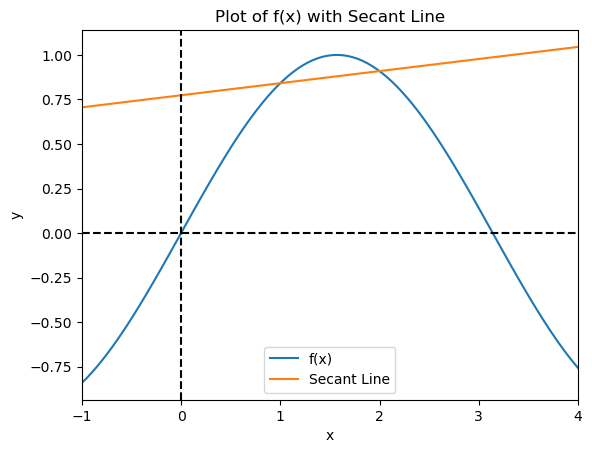

In [41]:
# Prompt user for a function f(x)
equation = input("Enter the function f(x): ")

# Define the function f(x)
def f(x):
    return eval(equation)

# Define the secant line function
def secant_line(x, a, b):
    return f(a) + (f(b) - f(a))/(b - a) * (x - a)

# Prompt user for values
a = float(input("Enter the value of a: "))
b = float(input("Enter the value of b: "))

# Generate x values
x = np.linspace(a - 2, b + 2, 100)

# Generate y values for f(x)
y = [f(val) for val in x]

# Generate y values for the secant line
secant = secant_line(x, a, b)

# Plot the function f(x) and the secant line
plt.plot(x, y, label='f(x)')
plt.plot(x, secant, label='Secant Line')

# Add the x=0 and y=0 axes
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')

# Set the x-axis and y-axis labels
plt.xlabel('x')
plt.ylabel('y')

# Set the title
plt.title('Plot of f(x) with Secant Line')

# Set the legend
plt.legend()

# Set the x-axis limits
plt.xlim(a - 2, b + 2)

# Display the plot
plt.show()

The word **tangent** comes from the Latin word *tangere*, meaning "to touch".

Given a continuous function $f(x)$ on the interval containing $x=a$, the **tangent line** on $f$ at $x=a$ is a straight line touching $f(x)$ at exactly $(a,f(a))$ and nowhere else.

The slope of this tangent line is the instantaneous rate of change of $f$ at $x=a$.

```{index} tangent line
```

Below is an example code prompting user to input function $f$ and $x=a$. Code will return the plot of $f$ together with its tangent line at $x=a$.

Enter the function f(x):  x**2
Enter the value of a:  2


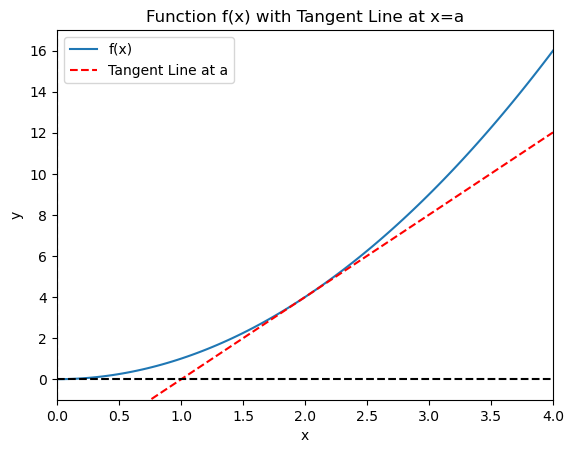

In [49]:
# Prompt the user to input the function f(x)
equation = input("Enter the function f(x): ")

# Prompt the user to input the value of a
a = float(input("Enter the value of a: "))

# Define the function f(x)
def f(x):
    return eval(equation)

# Generate x values for plotting
x = np.linspace(a - 2, a + 2, 100)

# Generate y values for the function f(x)
y = f(x)

# Calculate the tangent line at x = a
tangent_x = np.linspace(a - 2, a + 2, 100)
tangent_y = f(a) + (tangent_x - a) * (f(a + 0.01) - f(a)) / (0.01)

# Initialize the figure and axes
fig, ax = plt.subplots()

# Plot the function f(x)
ax.plot(x, y, label='f(x)')

# Plot the tangent line at x = a
ax.plot(tangent_x, tangent_y, 'r--', label='Tangent Line at a')

# Add the x=0 and y=0 axes
ax.axhline(0, color='black', linestyle='--')
ax.axvline(0, color='black', linestyle='--')

# Set the x-axis and y-axis limits
ax.set_xlim(a - 2, a + 2)
ax.set_ylim(min(y) - 1, max(y) + 1)

# Set the x-axis and y-axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')

# Set the title
ax.set_title('Function f(x) with Tangent Line at x=a')

# Set the legend
ax.legend()

# Display the plot
plt.show()

The tangent line at $x=a$ can be obtained by taking the secant line between $x=a$ and $x=b$, then bring $b$ closer and closer to $a$.

Taking $b=a+h$, the slope of the secant line between $x=a$ and $x=b$ is $\dfrac{f(a+h)-f(a)}{a+h-a}=\dfrac{f(a+h)-f(a)}{h}$.

Bringing $b \to a$ is then bringing $h\to 0$, and hence the slope of the tangent line at $x=a$ is $\lim\limits_{h \to 0}\dfrac{f(a+h)-f(a)}{h}$.
This realization is important as we introduce derivatives in the next section.

Below is the code showing the graph of $f(x)=x^2$ with the secant lines between $x=2$ and $x=b$, starting from $b=4$ until $b=2$, which gives the tangent line of $f(x)$ at $x=2$.

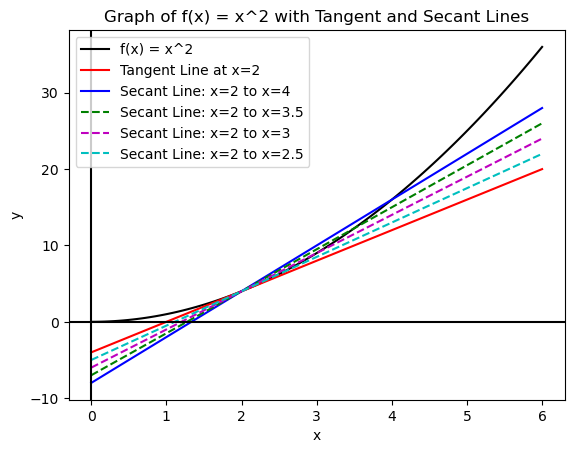

In [56]:
# Define the function f(x)
def f(x):
    return x**2

# Define the tangent line function at x = 2
def tangent_line(x):
    return 4 * (x - 2) + 4

# Define the secant line function
def secant_line(x, a, b):
    return (f(b) - f(a)) / (b - a) * (x - a) + f(a)

# Generate x values for plotting
x = np.linspace(0, 6, 100)

# Generate y values for the function f(x)
y = f(x)

# Generate y values for the tangent line at x = 2
tangent_y = tangent_line(x)

# Generate y values for the secant lines
secant_y1 = secant_line(x, 2, 4)
secant_y2 = secant_line(x, 2, 3.5)
secant_y3 = secant_line(x, 2, 3)
secant_y4 = secant_line(x, 2, 2.5)

# Initialize the figure and axes
fig, ax = plt.subplots()

# Plot the graph of f(x)
ax.plot(x, y, color='black', label='f(x) = x^2')

# Plot the tangent line at x = 2
ax.plot(x, tangent_y, 'r-', label='Tangent Line at x=2')

# Plot the secant lines
ax.plot(x, secant_y1, 'b-', label='Secant Line: x=2 to x=4')
ax.plot(x, secant_y2, 'g--', label='Secant Line: x=2 to x=3.5')
ax.plot(x, secant_y3, 'm--', label='Secant Line: x=2 to x=3')
ax.plot(x, secant_y4, 'c--', label='Secant Line: x=2 to x=2.5')

# Add the x=0 and y=0 axes
ax.axhline(0, color='black')
ax.axvline(0, color='black')

# Set the x-axis and y-axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')

# Set the title
ax.set_title('Graph of f(x) = x^2 with Tangent and Secant Lines')

# Set the legend
ax.legend()

# Display the plot
plt.show()

## Exercises

:::{admonition} Exercises

1. Given the graph of $f(x)$ below:

<img src="3LCR1.png" width="250px">

Determine whether or not $\lim\limits_{x\to 2}f(x)$ and $\lim\limits_{x\to 3}f(x)$ exists. Explain. 

2. Calculate the following limits. Explain why or why not the limit exists.
    - $\lim\limits_{x\to 7} 5\ln(x)$
    - $\lim\limits_{x\to 3} \left(3x^3+4x^2-5x-6\right)$
    - $\lim\limits_{x\to 0} \dfrac{1}{x}$
    
3. Do the following problems:
    - Evaluate $\lim\limits_{x\to 0}e^{\sin(x)}$
    - Find all zeroes of $f(x)=4x^3+3x^2-3x+0.2$ on the interval $[0,1]$
    
4. Given $f(x)=4x^3-2x^2+3x-7$. Calculate the following:
    - Change of $f$ between $x=-1$ and $x=2$ 
    - Percent change of $f$ between $x=-1$ and $x=2$ 
    - Average rate of change of $f$ between $x=-1$ and $x=2$ 
    - Instantaneous rate of change of $f$ at $x=3$
    - Percent rate of change of $f$ at $x=3$
    
5. Given $f(x)=4x^3-2x^2+3x-7$. Plot the following:
    - Secant line between on $f$ between $x=-1$ and $x=2$ 
    - Tangent line on $f$ at $x=3$
 :::